<a href="https://colab.research.google.com/github/hyeongwon12/py/blob/main/WEB_crwaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# p 312

import requests                       #웹페이지 연결
from bs4 import BeautifulSoup as bs   #가져온 페이지를 분석하기 용이하게 정제
import pandas as pd                   #데이터 분석 도구

In [ ]:
#html의 이해

#  html    +  css      +   js 
# 흑백TV     컬러TV      스마트TV

In [ ]:
# p 317

# URL Uniform Resource Locator 인터넷 주소

# https://m.naver.com/

In [ ]:
# 318

import requests                 # 파이썬으로 웹연결

url = 'https://www.naver.com/'  # 연결할 인터넷 주소
response = requests.get(url)    # 연결한 주소에서 모든 코드 읽어오기
print(f'응답 코드 : {response.status_code}')   # 크롤링 성공 여부 200 -> 성공
print(response.text)            # 긁어온 코드 보기

응답 코드 : 200
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="shangus : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'shangus'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'shangus'의 네이버 통합검색 결과입니다."> <title>shangus : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220414.css"> <link rel="styleshee
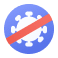
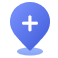
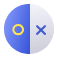
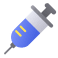
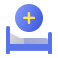

In [6]:
import requests   #파이썬으로 웹연결

url = 'https://search.naver.com/search.naver' # 연결할 주소
param = {'query':'shangus'}
response = requests.get(url,params = param)   #연결한 주소에서 모든 코드 읽어오기
print(f'응답 코드 : {response.status_code}')   # 크롤링 성공 여부 200 >> 성공
print(response.text)  #긁어온 코드보기


In [ ]:
#크롤링 실전

import requests #웹페이지 연결
from bs4 import BeautifulSoup as bs #가져온 페이지
import pandas as pd

html = requests.get('https://music.bugs.co.kr/chart')
soup = bs(html.text)
print(soup)

In [11]:
len(soup.select('tr'))  #태그를 선택할때는 soup.select

104

In [12]:
len(soup.select('tbody > tr'))

103

In [16]:
len(soup.select('table.byChart > tbody > tr'))

100

In [23]:
songs = soup.select('table.byChart > tbody > tr')
len(songs[0].select('p > a'))

2

In [24]:
songs[0].select('p.artist > a')

[<a href="https://music.bugs.co.kr/artist/3572?wl_ref=list_tr_10_chart" onclick="
 " title="싸이 (PSY)">싸이 (PSY)</a>]

In [25]:
songs[0].select('p.artist > a')[0].text

'싸이 (PSY)'

In [26]:
songs[0].select('p.title > a')[0].text

'That That (prod. & feat. SUGA of BTS)'

In [44]:
song_data=[]
rank = 1
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
  title = song.select('p.title > a')[0].text
  singer = song.select('p.artist > a')[0].text
  song_data.append(['Bugs',rank,title,singer])
  rank += 1

song_data

[['Bugs', 1, 'That That (prod. & feat. SUGA of BTS)', '싸이 (PSY)'],
 ['Bugs', 2, '봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)'],
 ['Bugs', 3, 'LOVE DIVE', 'IVE (아이브)'],
 ['Bugs', 4, '눈 떠보니 이별이더라', '빅마마(Big Mama)'],
 ['Bugs', 5, '꽃 길', 'BIGBANG (빅뱅)'],
 ['Bugs', 6, 'TOMBOY', '(여자)아이들'],
 ['Bugs', 7, 'LAST DANCE', 'BIGBANG (빅뱅)'],
 ['Bugs', 8, '에라 모르겠다', 'BIGBANG (빅뱅)'],
 ['Bugs', 9, '감동이야 (feat. 성시경)', '싸이 (PSY)'],
 ['Bugs', 10, '뱅뱅뱅 (BANG BANG BANG)', 'BIGBANG (빅뱅)'],
 ['Bugs', 11, '초대', '멜로망스(MeloMance)'],
 ['Bugs', 12, '사랑인가 봐', '멜로망스(MeloMance)'],
 ['Bugs', 13, 'Feel My Rhythm', 'Red Velvet (레드벨벳)'],
 ['Bugs', 14, 'LOVE me', "BE'O (비오)"],
 ['Bugs', 15, 'Seoul', '볼빨간사춘기'],
 ['Bugs', 16, 'Celeb', '싸이 (PSY)'],
 ['Bugs', 17, 'ZOOM', '제시(Jessi)'],
 ['Bugs', 18, "That's Hilarious", 'Charlie Puth(찰리 푸스)'],
 ['Bugs', 19, 'FEARLESS', 'LE SSERAFIM (르세라핌)'],
 ['Bugs', 20, '난 너 없이 (I hate you)', 'WOODZ (조승연)'],
 ['Bugs', 21, '봄 to 러브', '10CM'],
 ['Bugs', 22, '이제는 (feat. 화사)', '싸이 (PSY)'],
 ['Bugs', 23,

In [45]:
df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df

,차트명,순위,타이틀,가수
0,Bugs,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
1,Bugs,2,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
2,Bugs,3,LOVE DIVE,IVE (아이브)
3,Bugs,4,눈 떠보니 이별이더라,빅마마(Big Mama)
4,Bugs,5,꽃 길,BIGBANG (빅뱅)
...,...,...,...,...
95,Bugs,96,버퍼링 (Glitch Mode),NCT DREAM
96,Bugs,97,Happier (feat. Crush),싸이 (PSY)
97,Bugs,98,Blue Flame,LE SSERAFIM (르세라핌)
98,Bugs,99,GANJI (feat. Jessi),싸이 (PSY)


In [46]:
df.to_excel('bugs.xlsx', index=False)

In [47]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

from selenium import webdriver

options =webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

     |████████████████████████████████| 968 kB 25.0 MB/s 
     |████████████████████████████████| 138 kB 52.5 MB/s 
     |████████████████████████████████| 359 kB 56.0 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 4.0 MB 53.0 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [84.8 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.laun

In [ ]:
driver.get('https://www.melon.com/chart/')

In [ ]:
from bs4 import BeautifulSoup as bs   #가져온 페이지를 분석하기 용이하게 정제
import pandas as pd                   #데이터 분석 도구

html = driver.page_source
soup = bs(html)

In [ ]:
len(soup.select('tbody > tr'))

In [ ]:
songs[0]

In [ ]:
title = songs[0].select('div.rank01 > span > a')[0].text
singer = songs[0].select('div.rank02 > span > a')[0].text

In [ ]:
# 100곡 추출후 데이터프레임 만들고 엑셀 파일 만들기 

song_data = []
rank = 1

songs = soup.select('tbody > tr')

for song in songs: 
  title = song.select('div.rank01 > span > a')[0].text
  singer = song.select('div.rank02 > span > a')[0].text
  song_data.append(['Melon', rank, title, singer])
  rank += 1

df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df

In [ ]:
df.to_excel('melon.xlsx', index=False)